In [56]:
%%writefile funciones.h
#ifndef FUNCIONES_H
#define FUNCIONES_H

double predict(double coef[], double x[], int n);

#endif

Overwriting funciones.h


In [57]:
%%writefile funciones.c
#include "funciones.h"

double predict(double coef[], double x[], int n) {
    double y = coef[0];

    for (int i = 0; i < n; i++) {
        y += coef[i + 1] * x[i];
    }

    return y;
}

Overwriting funciones.c


In [58]:
%%writefile main.c
#include <stdio.h>
#include "funciones.h"

int main() {
    double coef[] = {1.5, -2.0, 3.5, 0.5};   // β0, β1, β2, β3
    double x[]    = {2.0, -1.0, 4.0};       // x1, x2, x3
    int n = 3;

    double y_pred = predict(coef, x, n);

    printf("Prediccion con nuevos datos:\n");
    printf("ŷ = %.1f + (%.1f)(%.1f) + (%.1f)(%.1f) + (%.1f)(%.1f) = %.1f\n",
           coef[0], coef[1], x[0],
           coef[2], x[1],
           coef[3], x[2],
           y_pred);

    return 0;
}

Overwriting main.c


In [59]:
!ls

funciones.c  main.c	sample_data	 tiro_parabolico.c
funciones.h  regresion	tiro_parabolico


In [60]:
!gcc main.c funciones.c -o regresion
!./regresion

Prediccion con nuevos datos:
ŷ = 1.5 + (-2.0)(2.0) + (3.5)(-1.0) + (0.5)(4.0) = -4.0


In [61]:
%%writefile main.c
#include <stdio.h>
#include "funciones.h"

int main() {
    double coef[] = {2.0, 0.5, -1.0};  // β0, β1, β2
    double x[]    = {4.0, 1.0};        // x1, x2
    int n = 2;

    double y_pred = predict(coef, x, n);

    printf("Prediccion con nuevos datos:\n");
    printf("ŷ = %.1f + (%.1f)(%.1f) + (%.1f)(%.1f) = %.1f\n",
           coef[0], coef[1], x[0],
           coef[2], x[1],
           y_pred);

    return 0;
}

Overwriting main.c


In [62]:
!gcc main.c funciones.c -o regresion
!./regresion


Prediccion con nuevos datos:
ŷ = 2.0 + (0.5)(4.0) + (-1.0)(1.0) = 3.0


In [63]:
%%writefile tiro_parabolico.c
#include <stdio.h>
#include <stdlib.h>
#include <math.h>
#include <time.h>



#define G 9.81   // gravedad

double yf(double y0, double x, double v, double theta_rad) {
    double t = x / (v * cos(theta_rad));
    return y0 + v*sin(theta_rad)*t - 0.5*G*t*t;
}

int main(int argc, char *argv[]) {
    if (argc != 10) {
        printf("Uso: %s y0 x v0 dv0 theta dtheta N Nbins seed\n", argv[0]);
        return 1;
    }

    double y0      = atof(argv[1]);
    double x       = atof(argv[2]);
    double v0      = atof(argv[3]);
    double dv0     = atof(argv[4]);
    double theta0  = atof(argv[5]) * M_PI / 180.0;      // grados → radianes
    double dtheta  = atof(argv[6]) * M_PI / 180.0;      // grados → radianes
    long N         = atol(argv[7]);
    int Nbins      = atoi(argv[8]);
    long seed      = atol(argv[9]);

    srand48(seed);

    double *Y = malloc(N * sizeof(double));
    if (!Y) {
        printf("Error de memoria.\n");
        return 1;
    }

    // Generar datos simulados
    for (long i = 0; i < N; i++) {
        double r = drand48();
        double q = drand48();
        double R = sqrt(-2.0 * log(r));
        double v_i     = v0     + dv0     * R * cos(2*M_PI*q);
        double theta_i = theta0 + dtheta  * R * sin(2*M_PI*q);

        Y[i] = yf(y0, x, v_i, theta_i);
    }

    // Calcular media y desviación
    double sum = 0;
    for (long i = 0; i < N; i++) sum += Y[i];
    double mean = sum / N;

    double var = 0;
    for (long i = 0; i < N; i++) var += (Y[i] - mean)*(Y[i] - mean);
    var /= N;
    double std = sqrt(var);

    // Construir histograma
    double min = Y[0], max = Y[0];
    for (long i = 1; i < N; i++) {
        if (Y[i] < min) min = Y[i];
        if (Y[i] > max) max = Y[i];
    }

    double binw = (max - min) / Nbins;
    int *hist = calloc(Nbins, sizeof(int));

    for (long i = 0; i < N; i++) {
        int b = (int)((Y[i] - min) / binw);
        if (b == Nbins) b--;
        hist[b]++;
    }


    printf("\n=== HISTOGRAMA DE y_f ===\n");
    for (int i = 0; i < Nbins; i++) {
        double a = min + i*binw;
        double b = min + (i+1)*binw;
        printf("[%.4f , %.4f): %d\n", a, b, hist[i]);
    }

    printf("\nMedia = %.6f\n", mean);
    printf("Desviacion estandar = %.6f\n", std);

    free(Y);
    free(hist);

    return 0;
}

Overwriting tiro_parabolico.c


In [64]:
!gcc tiro_parabolico.c -lm -o tiro_parabolico

In [65]:
!./tiro_parabolico 0.0  20.0  30.0  2.0  45.0  5.0  1000  20  1234


=== HISTOGRAMA DE y_f ===
[8.4966 , 9.4837): 5
[9.4837 , 10.4708): 10
[10.4708 , 11.4580): 27
[11.4580 , 12.4451): 67
[12.4451 , 13.4322): 92
[13.4322 , 14.4194): 146
[14.4194 , 15.4065): 141
[15.4065 , 16.3936): 132
[16.3936 , 17.3807): 122
[17.3807 , 18.3679): 91
[18.3679 , 19.3550): 69
[19.3550 , 20.3421): 36
[20.3421 , 21.3293): 23
[21.3293 , 22.3164): 19
[22.3164 , 23.3035): 7
[23.3035 , 24.2907): 5
[24.2907 , 25.2778): 6
[25.2778 , 26.2649): 0
[26.2649 , 27.2521): 1
[27.2521 , 28.2392): 1

Media = 15.748617
Desviacion estandar = 2.819225


In [66]:
for N in [10, 100, 1000, 10000, 100000, 1000000]:
    print("\n======= N =", N, "=======\n")
    !./tiro_parabolico 0.0 20.0 30.0 2.0 45.0 5.0 {N} 20 12


======= N = 10 =======


=== HISTOGRAMA DE y_f ===
[13.6887 , 14.1015): 2
[14.1015 , 14.5144): 1
[14.5144 , 14.9272): 0
[14.9272 , 15.3401): 0
[15.3401 , 15.7530): 1
[15.7530 , 16.1658): 1
[16.1658 , 16.5787): 0
[16.5787 , 16.9915): 0
[16.9915 , 17.4044): 0
[17.4044 , 17.8172): 1
[17.8172 , 18.2301): 1
[18.2301 , 18.6429): 1
[18.6429 , 19.0558): 0
[19.0558 , 19.4687): 0
[19.4687 , 19.8815): 1
[19.8815 , 20.2944): 0
[20.2944 , 20.7072): 0
[20.7072 , 21.1201): 0
[21.1201 , 21.5329): 0
[21.5329 , 21.9458): 1

Media = 16.970665
Desviacion estandar = 2.547061

======= N = 100 =======


=== HISTOGRAMA DE y_f ===
[11.1708 , 12.0638): 7
[12.0638 , 12.9569): 5
[12.9569 , 13.8499): 9
[13.8499 , 14.7429): 13
[14.7429 , 15.6359): 13
[15.6359 , 16.5289): 14
[16.5289 , 17.4219): 7
[17.4219 , 18.3149): 8
[18.3149 , 19.2079): 9
[19.2079 , 20.1010): 7
[20.1010 , 20.9940): 3
[20.9940 , 21.8870): 3
[21.8870 , 22.7800): 1
[22.7800 , 23.6730): 0
[23.6730 , 24.5660): 0
[24.5660 , 25.4590): 0
[25.4590 , 26.

In [67]:
!gcc tiro_parabolico.c -o tiro

/usr/bin/ld: /tmp/ccLXdxOb.o: in function `yf':
tiro_parabolico.c:(.text+0x2a): undefined reference to `cos'
/usr/bin/ld: tiro_parabolico.c:(.text+0x55): undefined reference to `sin'
/usr/bin/ld: /tmp/ccLXdxOb.o: in function `main':
tiro_parabolico.c:(.text+0x2a3): undefined reference to `log'
/usr/bin/ld: tiro_parabolico.c:(.text+0x2be): undefined reference to `sqrt'
/usr/bin/ld: tiro_parabolico.c:(.text+0x2fc): undefined reference to `cos'
/usr/bin/ld: tiro_parabolico.c:(.text+0x34a): undefined reference to `sin'
/usr/bin/ld: tiro_parabolico.c:(.text+0x4f8): undefined reference to `sqrt'
collect2: error: ld returned 1 exit status


In [68]:
!ls

funciones.c  main.c	sample_data	 tiro_parabolico.c
funciones.h  regresion	tiro_parabolico


In [69]:
!gcc tiro_parabolico.c -lm -o tiro

In [70]:
!ls

funciones.c  main.c	sample_data  tiro_parabolico
funciones.h  regresion	tiro	     tiro_parabolico.c


In [71]:
# N = 10
!./tiro 10 20 10 1 45 5 10      20 1234

# N = 100
!./tiro 10 20 10 1 45 5 100     20 1234

# N = 1000
!./tiro 10 20 10 1 45 5 1000    20 1234

# N = 10000
!./tiro 10 20 10 1 45 5 10000   20 1234

# N = 100000
!./tiro 10 20 10 1 45 5 100000  20 1234

# N = 1000000
!./tiro 10 20 10 1 45 5 1000000 20 1234


=== HISTOGRAMA DE y_f ===
[-49.4180 , -47.3070): 1
[-47.3070 , -45.1959): 0
[-45.1959 , -43.0848): 0
[-43.0848 , -40.9737): 0
[-40.9737 , -38.8626): 0
[-38.8626 , -36.7515): 0
[-36.7515 , -34.6404): 0
[-34.6404 , -32.5293): 0
[-32.5293 , -30.4182): 0
[-30.4182 , -28.3071): 0
[-28.3071 , -26.1960): 0
[-26.1960 , -24.0849): 0
[-24.0849 , -21.9738): 3
[-21.9738 , -19.8627): 0
[-19.8627 , -17.7516): 1
[-17.7516 , -15.6405): 0
[-15.6405 , -13.5294): 1
[-13.5294 , -11.4183): 0
[-11.4183 , -9.3072): 2
[-9.3072 , -7.1961): 2

Media = -18.797652
Desviacion estandar = 11.787406

=== HISTOGRAMA DE y_f ===
[-81.0052 , -76.6689): 1
[-76.6689 , -72.3326): 0
[-72.3326 , -67.9963): 0
[-67.9963 , -63.6599): 0
[-63.6599 , -59.3236): 0
[-59.3236 , -54.9873): 0
[-54.9873 , -50.6510): 0
[-50.6510 , -46.3147): 1
[-46.3147 , -41.9783): 0
[-41.9783 , -37.6420): 0
[-37.6420 , -33.3057): 0
[-33.3057 , -28.9694): 3
[-28.9694 , -24.6331): 1
[-24.6331 , -20.2967): 12
[-20.2967 , -15.9604): 15
[-15.9604 , -11.6241

In [72]:
import subprocess, re
import numpy as np

Ns = [10, 100, 1000, 10000, 100000, 1000000]
medias = []
stds = []

for N in Ns:
    cmd = f"./tiro 10 20 10 1 45 5 {N} 20 1234"
    result = subprocess.run(cmd.split(), capture_output=True, text=True)
    print("Salida para N =", N)
    print(result.stdout)

    # Buscar la línea de Media y Desviación estándar en la salida
    m = re.search(r"Media\s*=\s*([-0-9.eE+]+)", result.stdout)
    s = re.search(r"Desviacion estandar\s*=\s*([-0-9.eE+]+)", result.stdout)

    medias.append(float(m.group(1)))
    stds.append(float(s.group(1)))

Salida para N = 10

=== HISTOGRAMA DE y_f ===
[-49.4180 , -47.3070): 1
[-47.3070 , -45.1959): 0
[-45.1959 , -43.0848): 0
[-43.0848 , -40.9737): 0
[-40.9737 , -38.8626): 0
[-38.8626 , -36.7515): 0
[-36.7515 , -34.6404): 0
[-34.6404 , -32.5293): 0
[-32.5293 , -30.4182): 0
[-30.4182 , -28.3071): 0
[-28.3071 , -26.1960): 0
[-26.1960 , -24.0849): 0
[-24.0849 , -21.9738): 3
[-21.9738 , -19.8627): 0
[-19.8627 , -17.7516): 1
[-17.7516 , -15.6405): 0
[-15.6405 , -13.5294): 1
[-13.5294 , -11.4183): 0
[-11.4183 , -9.3072): 2
[-9.3072 , -7.1961): 2

Media = -18.797652
Desviacion estandar = 11.787406

Salida para N = 100

=== HISTOGRAMA DE y_f ===
[-81.0052 , -76.6689): 1
[-76.6689 , -72.3326): 0
[-72.3326 , -67.9963): 0
[-67.9963 , -63.6599): 0
[-63.6599 , -59.3236): 0
[-59.3236 , -54.9873): 0
[-54.9873 , -50.6510): 0
[-50.6510 , -46.3147): 1
[-46.3147 , -41.9783): 0
[-41.9783 , -37.6420): 0
[-37.6420 , -33.3057): 0
[-33.3057 , -28.9694): 3
[-28.9694 , -24.6331): 1
[-24.6331 , -20.2967): 12
[-20.2


===== Salida para N = 10 =====

=== HISTOGRAMA DE y_f ===
[-49.4180 , -47.3070): 1
[-47.3070 , -45.1959): 0
[-45.1959 , -43.0848): 0
[-43.0848 , -40.9737): 0
[-40.9737 , -38.8626): 0
[-38.8626 , -36.7515): 0
[-36.7515 , -34.6404): 0
[-34.6404 , -32.5293): 0
[-32.5293 , -30.4182): 0
[-30.4182 , -28.3071): 0
[-28.3071 , -26.1960): 0
[-26.1960 , -24.0849): 0
[-24.0849 , -21.9738): 3
[-21.9738 , -19.8627): 0
[-19.8627 , -17.7516): 1
[-17.7516 , -15.6405): 0
[-15.6405 , -13.5294): 1
[-13.5294 , -11.4183): 0
[-11.4183 , -9.3072): 2
[-9.3072 , -7.1961): 2

Media = -18.797652
Desviacion estandar = 11.787406


===== Salida para N = 100 =====

=== HISTOGRAMA DE y_f ===
[-81.0052 , -76.6689): 1
[-76.6689 , -72.3326): 0
[-72.3326 , -67.9963): 0
[-67.9963 , -63.6599): 0
[-63.6599 , -59.3236): 0
[-59.3236 , -54.9873): 0
[-54.9873 , -50.6510): 0
[-50.6510 , -46.3147): 1
[-46.3147 , -41.9783): 0
[-41.9783 , -37.6420): 0
[-37.6420 , -33.3057): 0
[-33.3057 , -28.9694): 3
[-28.9694 , -24.6331): 1
[-24.6

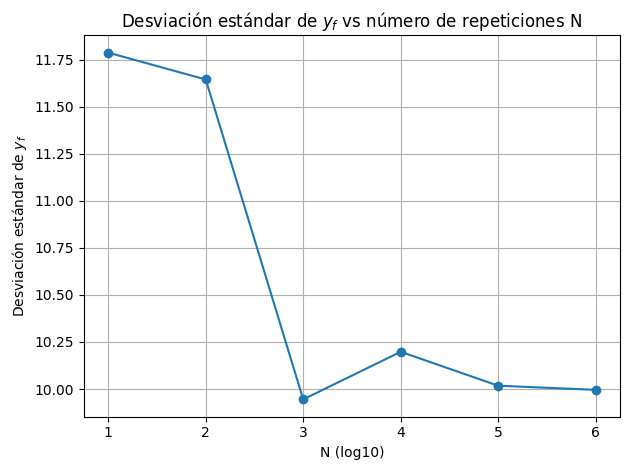

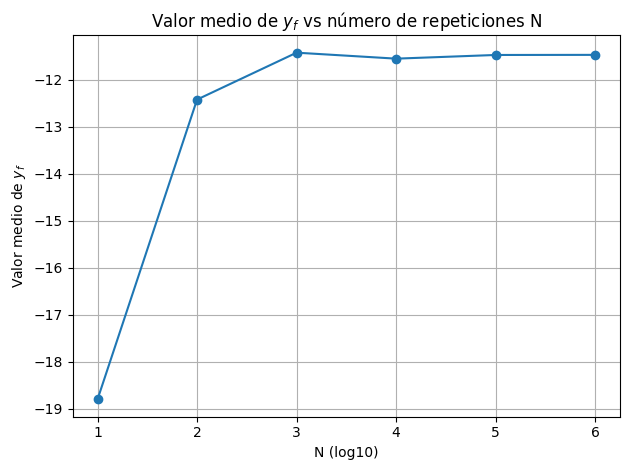

In [74]:
import numpy as np
import subprocess, re
import matplotlib.pyplot as plt

# Valores de N
Ns = [10, 100, 1000, 10000, 100000, 1000000]

medias = []
stds = []

# Ejecutar el programa en C para cada N y extraer media y desviación estándar
for N in Ns:
    cmd = ["./tiro", "10", "20", "10", "1", "45", "5", str(N), "20", "1234"]
    result = subprocess.run(cmd, capture_output=True, text=True)

    print(f"\n===== Salida para N = {N} =====")
    print(result.stdout)

    m = re.search(r"Media\s*=\s*([-0-9.eE+]+)", result.stdout)
    s = re.search(r"Desviacion estandar\s*=\s*([-0-9.eE+]+)", result.stdout)

    medias.append(float(m.group(1)))
    stds.append(float(s.group(1)))

# Convertir N a escala log10 para las gráficas
Nlog = np.log10(Ns)

# Gráfica 1: desviación estándar
plt.figure()
plt.plot(Nlog, stds, marker='o')
plt.xlabel('N (log10)')
plt.ylabel('Desviación estándar de $y_f$')
plt.title('Desviación estándar de $y_f$ vs número de repeticiones N')
plt.grid(True)
plt.tight_layout()
plt.savefig('std_vs_N.pdf')

# Gráfica 2: valor medio
plt.figure()
plt.plot(Nlog, medias, marker='o')
plt.xlabel('N (log10)')
plt.ylabel('Valor medio de $y_f$')
plt.title('Valor medio de $y_f$ vs número de repeticiones N')
plt.grid(True)
plt.tight_layout()
plt.savefig('mean_vs_N.pdf')


In [75]:
from google.colab import files

files.download('std_vs_N.pdf')
files.download('mean_vs_N.pdf')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>